In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os
sys.path.append("../../")

In [3]:
from utils.transformer import  DataTransformer
from utils.dataset import Dataset
from metrics.utility import efficacy_test
from sklearn.metrics import accuracy_score

In [4]:
train_dset = Dataset(
    dataset_name="adult",
    dataset_dir="../",
    subset="train",
    random_state=1000,
    return_filtered_cols=False
)

print(train_dset.data.shape)
train_dset.data.head()

(32561, 15)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,39.0,77516.0,13.0,2174.0,0.0,40.0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,50.0,83311.0,13.0,0.0,0.0,13.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,38.0,215646.0,9.0,0.0,0.0,40.0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,53.0,234721.0,7.0,0.0,0.0,40.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,28.0,338409.0,13.0,0.0,0.0,40.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [5]:
train_dset.cat_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [6]:
train_dset.num_cols

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

<AxesSubplot:ylabel='Density'>

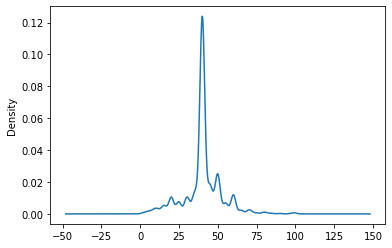

In [7]:
train_dset.data["hours-per-week"].plot(kind="density")

In [8]:
train_dset.data["education-num"].value_counts()

9.0     10501
10.0     7291
13.0     5355
14.0     1723
11.0     1382
7.0      1175
12.0     1067
6.0       933
4.0       646
15.0      576
5.0       514
8.0       433
16.0      413
3.0       333
2.0       168
1.0        51
Name: education-num, dtype: int64

## Explore filtered columns

In [9]:
train_dset = Dataset(
    dataset_name="adult",
    dataset_dir="../",
    subset="train",
    random_state=1000,
    return_filtered_cols=True
)

print(train_dset.data.shape)
train_dset.data.head()

(32561, 11)


,age,capital-gain,capital-loss,workclass,education,marital-status,occupation,sex,race,native-country,income
0,39.0,2174.0,0.0,State-gov,Bachelors,Never-married,Adm-clerical,Male,White,United-States,<=50K
1,50.0,0.0,0.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Male,White,United-States,<=50K
2,38.0,0.0,0.0,Private,HS-grad,Divorced,Handlers-cleaners,Male,White,United-States,<=50K
3,53.0,0.0,0.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Male,Black,United-States,<=50K
4,28.0,0.0,0.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Female,Black,Cuba,<=50K


<AxesSubplot:ylabel='Frequency'>

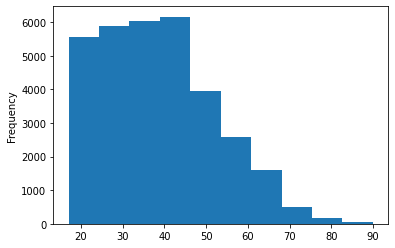

In [10]:
train_dset.data.age.plot.hist()

<AxesSubplot:>

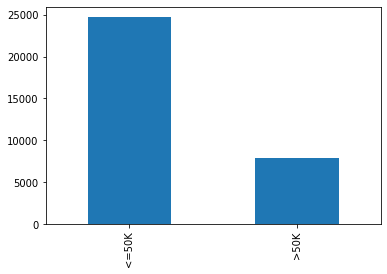

In [11]:
train_dset.data.income.value_counts().plot.bar()

In [12]:
test_dset = Dataset(
    dataset_name="adult",
    dataset_dir="../",
    subset="test",
    random_state=1000,
    return_filtered_cols=True
)

print(test_dset.data.shape)
test_dset.data.head()

(16281, 11)


,age,capital-gain,capital-loss,workclass,education,marital-status,occupation,sex,race,native-country,income
0,25.0,0.0,0.0,Private,11th,Never-married,Machine-op-inspct,Male,Black,United-States,<=50K
1,38.0,0.0,0.0,Private,HS-grad,Married-civ-spouse,Farming-fishing,Male,White,United-States,<=50K
2,28.0,0.0,0.0,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Male,White,United-States,>50K
3,44.0,7688.0,0.0,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Male,Black,United-States,>50K
4,18.0,0.0,0.0,?,Some-college,Never-married,?,Female,White,United-States,<=50K


<AxesSubplot:ylabel='Frequency'>

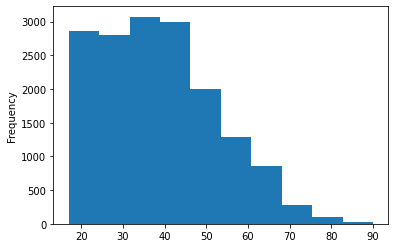

In [13]:
test_dset.data.age.plot.hist()

<AxesSubplot:>

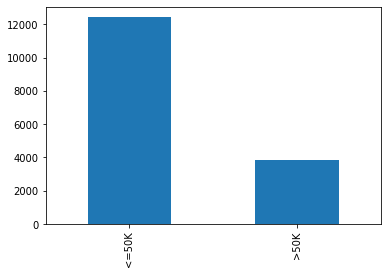

In [14]:
test_dset.data.income.value_counts().plot.bar()

## Train/Evaluate Logistic Regression model on filtered Columns 

In [15]:
transformer = DataTransformer(
        discrete_encode="onehot",
        numerical_preprocess="standard",
        target="income"
)

train_dset = Dataset(
    dataset_name="adult",
    dataset_dir="../",
    subset="train",
    data_frac=None,
    random_state=1000,
    return_filtered_cols=True
)

test_dset = Dataset(
    dataset_name="adult",
    dataset_dir="../",
    subset="test",
    data_frac=None,
    random_state=1000,
    return_filtered_cols=True
)


test_data = test_dset.data
train_data = train_dset.data
transformer.fit(train_data, train_dset.cat_cols)

print(train_data.shape, test_data.shape)
print(f"# categorical columns: {len(train_dset.cat_cols)}")
print(f"features/label dim: {test_dset.get_dim()}")

f1_score = efficacy_test(fakedata=train_data, realdata=test_data, target_name="income", transformer=transformer)
acc_score = efficacy_test(fakedata=train_data, realdata=test_data, target_name="income", transformer=transformer, 
                                  scorer=accuracy_score)

print(f"F1 Score: {f1_score} \nAcc Score: {acc_score}")


(32561, 11) (16281, 11)
# categorical columns: 8
features/label dim: (11, 0)
F1 Score: 0.6710581346716855 
Acc Score: 0.8067686260057736


## Train/Evaluate Logistic Regression model on all columns

In [16]:
transformer = DataTransformer(
        discrete_encode="onehot",
        numerical_preprocess="standard",
        target="income"
)

train_dset = Dataset(
    dataset_name="adult",
    dataset_dir="../",
    subset="train",
    data_frac=None,
    random_state=1000,
    return_filtered_cols=False
)

test_dset = Dataset(
    dataset_name="adult",
    dataset_dir="../",
    subset="test",
    data_frac=None,
    random_state=1000,
    return_filtered_cols=False
)


test_data = test_dset.data
train_data = train_dset.data
transformer.fit(train_data, train_dset.cat_cols)

print(train_data.shape, test_data.shape)
print(f"# categorical columns: {len(train_dset.cat_cols)}")
print(f"features/label dim: {test_dset.get_dim()}")

f1_score = efficacy_test(fakedata=train_data, realdata=test_data, target_name="income", transformer=transformer)
acc_score = efficacy_test(fakedata=train_data, realdata=test_data, target_name="income", transformer=transformer, 
                                  scorer=accuracy_score)

print(f"F1 Score: {f1_score} \nAcc Score: {acc_score}")


(32561, 15) (16281, 15)
# categorical columns: 9
features/label dim: (15, 0)
F1 Score: 0.6745155240675141 
Acc Score: 0.8081198943553836


## Train/Evaluate Logistic Regression model on filtered columns with varying data subsets

In [17]:
from utils.misc import geometric_sequence
seed = 1000
subsets = geometric_sequence(start_value=20, 
                             common_ratio=2, 
                             size=10)

In [18]:
transformer = DataTransformer(
        discrete_encode="onehot",
        numerical_preprocess="standard",
        target="income"
)

test_dset = Dataset(
        dataset_name="adult",
        dataset_dir="../",
        subset="test",
        data_frac=None,
        random_state=seed,
        return_filtered_cols=True
)

test_data = test_dset.data
transformer.fit(test_data, test_dset.cat_cols)

for subset in subsets:
    train_dset = Dataset(
        dataset_name="adult",
        dataset_dir="../",
        subset="train",
        data_frac=subset,
        random_state=seed,
        return_filtered_cols=True
        )
    train_data = train_dset.data
    
    f1_train = efficacy_test(fakedata=train_data, realdata=train_data, target_name="income", transformer=transformer)
    acc_train = efficacy_test(fakedata=train_data, realdata=train_data, target_name="income", transformer=transformer, scorer=accuracy_score)
    
    f1_test = efficacy_test(fakedata=train_data, realdata=test_data, target_name="income", transformer=transformer)
    acc_test = efficacy_test(fakedata=train_data, realdata=test_data, target_name="income", transformer=transformer, scorer=accuracy_score)

    print(f"subset: {subset}: Train/Test-F1: {f1_train:.3f}/{f1_test:.3f} Train/Test-Acc: {acc_train:.3f}/{acc_test:.3f}")
    

subset: 20: Train/Test-F1: 1.000/0.512 Train/Test-Acc: 1.000/0.731
subset: 40: Train/Test-F1: 0.933/0.513 Train/Test-Acc: 0.975/0.758
subset: 80: Train/Test-F1: 0.769/0.585 Train/Test-Acc: 0.887/0.748
subset: 160: Train/Test-F1: 0.729/0.615 Train/Test-Acc: 0.856/0.781
subset: 320: Train/Test-F1: 0.739/0.627 Train/Test-Acc: 0.856/0.800
subset: 640: Train/Test-F1: 0.688/0.645 Train/Test-Acc: 0.820/0.799
subset: 1280: Train/Test-F1: 0.691/0.650 Train/Test-Acc: 0.819/0.797
subset: 2560: Train/Test-F1: 0.706/0.658 Train/Test-Acc: 0.829/0.801
subset: 5120: Train/Test-F1: 0.691/0.664 Train/Test-Acc: 0.825/0.803
subset: 10240: Train/Test-F1: 0.682/0.664 Train/Test-Acc: 0.812/0.801
subset: 20480: Train/Test-F1: 0.672/0.670 Train/Test-Acc: 0.807/0.806


## Train/Evaluate Logistic Regression model on all columns with varying data subsets

In [19]:
from utils.misc import geometric_sequence
seed = 1000
subsets = geometric_sequence(start_value=20, 
                             common_ratio=2, 
                             size=10)

In [20]:
transformer = DataTransformer(
        discrete_encode="onehot",
        numerical_preprocess="standard",
        target="income"
)

test_dset = Dataset(
        dataset_name="adult",
        dataset_dir="../",
        subset="test",
        data_frac=None,
        random_state=seed,
        return_filtered_cols=False
)

test_data = test_dset.data
transformer.fit(test_data, test_dset.cat_cols)

for subset in subsets:
    train_dset = Dataset(
        dataset_name="adult",
        dataset_dir="../",
        subset="train",
        data_frac=subset,
        random_state=seed,
        return_filtered_cols=False
        )


    train_data = train_dset.data
    
    f1_train = efficacy_test(fakedata=train_data, realdata=train_data, target_name="income", transformer=transformer)
    acc_train = efficacy_test(fakedata=train_data, realdata=train_data, target_name="income", transformer=transformer, scorer=accuracy_score)
    
    f1_test = efficacy_test(fakedata=train_data, realdata=test_data, target_name="income", transformer=transformer)
    acc_test = efficacy_test(fakedata=train_data, realdata=test_data, target_name="income", transformer=transformer, scorer=accuracy_score)

    print(f"subset: {subset}: Train/Test-F1: {f1_train:.3f}/{f1_test:.3f} Train/Test-Acc: {acc_train:.3f}/{acc_test:.3f}")
    

subset: 20: Train/Test-F1: 1.000/0.550 Train/Test-Acc: 1.000/0.741
subset: 40: Train/Test-F1: 0.933/0.532 Train/Test-Acc: 0.975/0.762
subset: 80: Train/Test-F1: 0.762/0.581 Train/Test-Acc: 0.875/0.747
subset: 160: Train/Test-F1: 0.706/0.633 Train/Test-Acc: 0.844/0.791
subset: 320: Train/Test-F1: 0.751/0.646 Train/Test-Acc: 0.866/0.809
subset: 640: Train/Test-F1: 0.698/0.654 Train/Test-Acc: 0.828/0.803
subset: 1280: Train/Test-F1: 0.701/0.658 Train/Test-Acc: 0.825/0.801
subset: 2560: Train/Test-F1: 0.719/0.665 Train/Test-Acc: 0.837/0.804
subset: 5120: Train/Test-F1: 0.692/0.672 Train/Test-Acc: 0.823/0.807
subset: 10240: Train/Test-F1: 0.688/0.673 Train/Test-Acc: 0.814/0.806
subset: 20480: Train/Test-F1: 0.681/0.675 Train/Test-Acc: 0.811/0.808


### Train Logistic Regression model on Adult train dataset, Evaluate on Adult test and Census test data

In [21]:
transformer = DataTransformer(
        discrete_encode="onehot",
        numerical_preprocess="standard",
        target="income"
)


test_census_v2_dset = Dataset(
            dataset_name="census_v2",
            dataset_dir="../",
            subset="test",
            data_frac=None,
            random_state=seed,
)

test_census_dset = Dataset(
            dataset_name="census",
            dataset_dir="../",
            subset="test",
            data_frac=None,
            random_state=seed,
            return_filtered_cols=True
)


test_dset = Dataset(
            dataset_name="adult",
            dataset_dir="../",
            subset="test",
            data_frac=None,
            random_state=seed,
            return_filtered_cols=True
)

train_dset = Dataset(
        dataset_name="adult",
        dataset_dir="../",
        subset="train",
        data_frac=None,
        random_state=seed,
        return_filtered_cols=True,
)

train_data = train_dset.data
test_data = test_dset.data
test_census_data = test_census_dset.data
test_census_data.columns = train_data.columns
test_census_v2_data = test_census_v2_dset.data

transformer.fit(train_data, train_dset.cat_cols)

In [22]:
f1_adult = efficacy_test(fakedata=train_data, realdata=test_data, target_name="income", transformer=transformer)
acc_adult = efficacy_test(fakedata=train_data, realdata=test_data, target_name="income", transformer=transformer, scorer=accuracy_score)
    
f1_census = efficacy_test(fakedata=train_data, realdata=test_census_data, target_name="income", transformer=transformer)
acc_census = efficacy_test(fakedata=train_data, realdata=test_census_data, target_name="income", transformer=transformer, scorer=accuracy_score)
    
f1_census_v2 = efficacy_test(fakedata=train_data, realdata=test_census_v2_data, target_name="income", transformer=transformer)
acc_census_v2 = efficacy_test(fakedata=train_data, realdata=test_census_v2_data, target_name="income", transformer=transformer, scorer=accuracy_score)
    
    
    
    
print(f"Adult/Census/Census_v2 F1 Score: {f1_adult:.3f}/{f1_census:.3f}/{f1_census_v2:.3f} \nAdult/Census/Census_v2 Acc Score: {acc_adult:.3f}/{acc_census:.3f}/{acc_census_v2:.3f}")


Adult/Census/Census_v2 F1 Score: 0.671/0.320/0.349 
Adult/Census/Census_v2 Acc Score: 0.807/0.937/0.753


In [23]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

### Adult Dataset

In [24]:
matrix = efficacy_test(fakedata=train_data, 
                       realdata=test_data, 
                       target_name="income", 
                       transformer=transformer, 
                       scorer=confusion_matrix)
print(matrix)

[[9926 2509]
 [ 637 3209]]


In [25]:
report = efficacy_test(fakedata=train_data, 
                       realdata=test_data, 
                       target_name="income", 
                       transformer=transformer, 
                       scorer=classification_report)
print(report)

              precision    recall  f1-score   support

         0.0       0.94      0.80      0.86     12435
         1.0       0.56      0.83      0.67      3846

    accuracy                           0.81     16281
   macro avg       0.75      0.82      0.77     16281
weighted avg       0.85      0.81      0.82     16281



### Census Dataset: recalls less of the minority class

In [26]:
matrix = efficacy_test(fakedata=train_data, 
                       realdata=test_census_data, 
                       target_name="income", 
                       transformer=transformer, 
                       scorer=confusion_matrix)
print(matrix)

[[91948  1628]
 [ 4696  1490]]


In [27]:
report = efficacy_test(fakedata=train_data, 
                       realdata=test_census_data, 
                       target_name="income", 
                       transformer=transformer, 
                       scorer=classification_report)
print(report)

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97     93576
         1.0       0.48      0.24      0.32      6186

    accuracy                           0.94     99762
   macro avg       0.71      0.61      0.64     99762
weighted avg       0.92      0.94      0.93     99762



### Census_v2: recalls more of the minority class

In [28]:
matrix = efficacy_test(fakedata=train_data, 
                       realdata=test_census_v2_data, 
                       target_name="income", 
                       transformer=transformer, 
                       scorer=confusion_matrix)
print(matrix)

[[52371 17763]
 [ 1119  5067]]


In [29]:
report = efficacy_test(fakedata=train_data, 
                       realdata=test_census_v2_data, 
                       target_name="income", 
                       transformer=transformer, 
                       scorer=classification_report)
print(report)

              precision    recall  f1-score   support

         0.0       0.98      0.75      0.85     70134
         1.0       0.22      0.82      0.35      6186

    accuracy                           0.75     76320
   macro avg       0.60      0.78      0.60     76320
weighted avg       0.92      0.75      0.81     76320



### Display mistakes across three datasets

In [30]:
import numpy as np
def unique_mistakes(y_true, y_pred):
    mistakes = np.where(y_true!=y_pred)[0]
    return mistakes

### Adult test mistakes

In [31]:
mistakes_indices = efficacy_test(fakedata=train_data, 
                               realdata=test_data, 
                               target_name="income", 
                               transformer=transformer, 
                               scorer=unique_mistakes)
test_data.iloc[mistakes_indices].head()

,age,capital-gain,capital-loss,workclass,education,marital-status,occupation,sex,race,native-country,income
11,36.0,0.0,0.0,Federal-gov,Bachelors,Married-civ-spouse,Adm-clerical,Male,White,United-States,<=50K
24,25.0,0.0,0.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Male,White,United-States,<=50K
28,54.0,0.0,0.0,Private,HS-grad,Married-civ-spouse,Craft-repair,Male,White,United-States,<=50K
33,23.0,0.0,0.0,Local-gov,Some-college,Married-civ-spouse,Protective-serv,Male,White,United-States,<=50K
47,54.0,3908.0,0.0,Private,Some-college,Married-civ-spouse,Transport-moving,Male,White,United-States,<=50K


### Census test mistakes

In [32]:
mistakes_indices = efficacy_test(fakedata=train_data, 
                               realdata=test_census_data, 
                               target_name="income", 
                               transformer=transformer, 
                               scorer=unique_mistakes)
test_census_data.iloc[mistakes_indices].head()

,age,capital-gain,capital-loss,workclass,education,marital-status,occupation,sex,race,native-country,income
29,46.0,15024.0,0.0,Private,Some college but no degree,Married-civilian spouse present,Precision production craft & repair,Male,White,United-States,<=50K
33,35.0,0.0,0.0,Private,Masters degree(MA MS MEng MEd MSW MBA),Never married,Sales,Male,White,United-States,>50K
79,38.0,7688.0,0.0,Private,Some college but no degree,Married-civilian spouse present,Precision production craft & repair,Male,White,United-States,<=50K
100,60.0,0.0,0.0,Self-employed-not incorporated,Associates degree-academic program,Never married,Executive admin and managerial,Male,White,United-States,>50K
125,41.0,0.0,0.0,Local government,Some college but no degree,Married-civilian spouse present,Adm support including clerical,Male,White,United-States,>50K


### Census_v2 test mistakes

In [33]:
mistakes_indices = efficacy_test(fakedata=train_data, 
                               realdata=test_census_v2_data, 
                               target_name="income", 
                               transformer=transformer, 
                               scorer=unique_mistakes)
test_census_v2_data.iloc[mistakes_indices].head()

,age,capital-gain,capital-loss,workclass,education,marital-status,occupation,sex,race,native-country,income
1,44.0,0.0,0.0,Self-emp-not-inc,Assoc-voc,Married-civ-spouse,Prof-specialty,Female,White,United-States,<=50K
5,38.0,0.0,0.0,Private,Masters,Married-civ-spouse,Prof-specialty,Male,Black,United-States,<=50K
6,30.0,0.0,0.0,Private,Bachelors,Married-civ-spouse,Adm-clerical,Female,White,United-States,<=50K
12,23.0,0.0,0.0,Private,Bachelors,Married-civ-spouse,Adm-clerical,Male,White,United-States,<=50K
18,45.0,0.0,0.0,Private,Some-college,Married-civ-spouse,Sales,Male,White,United-States,<=50K


### Which categorical column is most predictive?

In [34]:
target = "income"
for col in train_dset.cat_cols:
    if col != target:
        train = train_data[[col, target]]
        test = test_data[[col, target]]
        test_census=test_census_data[[col, target]]
        test_census_v2=test_census_v2_data[[col, target]]

        transformer.fit(train, discrete_columns=[col, target])
        f1_adult = efficacy_test(fakedata=train, realdata=test, target_name="income", transformer=transformer)
        acc_adult = efficacy_test(fakedata=train, realdata=test, target_name="income", transformer=transformer, scorer=accuracy_score)

        f1_census = efficacy_test(fakedata=train, realdata=test_census, target_name="income", transformer=transformer)
        acc_census = efficacy_test(fakedata=train, realdata=test_census, target_name="income", transformer=transformer, scorer=accuracy_score)
        
        f1_census_v2 = efficacy_test(fakedata=train, realdata=test_census_v2, target_name="income", transformer=transformer)
        acc_census_v2 = efficacy_test(fakedata=train, realdata=test_census_v2, target_name="income", transformer=transformer, scorer=accuracy_score)




        print(f"Column: {col} \nAdult/Census/Census_v2 F1 Score: {f1_adult:.3f}/{f1_census:.3f}/{f1_census_v2:.3f} \nAdult/Census/Census_v2 Acc Score: {acc_adult:.3f}/{acc_census:.3f}/{acc_census_v2:.3f}")


Column: workclass 
Adult/Census/Census_v2 F1 Score: 0.339/0.000/0.210 
Adult/Census/Census_v2 Acc Score: 0.677/0.938/0.798
Column: education 
Adult/Census/Census_v2 F1 Score: 0.488/0.000/0.326 
Adult/Census/Census_v2 Acc Score: 0.714/0.938/0.773
Column: marital-status 
Adult/Census/Census_v2 F1 Score: 0.585/0.000/0.199 
Adult/Census/Census_v2 Acc Score: 0.713/0.938/0.490
Column: occupation 
Adult/Census/Census_v2 F1 Score: 0.489/0.123/0.331 
Adult/Census/Census_v2 Acc Score: 0.667/0.893/0.758
Column: sex 
Adult/Census/Census_v2 F1 Score: 0.443/0.180/0.231 
Adult/Census/Census_v2 Acc Score: 0.497/0.555/0.574
Column: race 
Adult/Census/Census_v2 F1 Score: 0.397/0.126/0.159 
Adult/Census/Census_v2 Acc Score: 0.323/0.213/0.192
Column: native-country 
Adult/Census/Census_v2 F1 Score: 0.390/0.121/0.157 
Adult/Census/Census_v2 Acc Score: 0.276/0.124/0.154


### Which numerical column is most predictive

In [35]:
target = "income"
for col in train_dset.num_cols:
    train = train_data[[col, target]]
    test = test_data[[col, target]]
    test_census=test_census_data[[col, target]]
    test_census_v2=test_census_v2_data[[col, target]]

    transformer.fit(train, discrete_columns=[target])
    f1_adult = efficacy_test(fakedata=train, realdata=test, target_name="income", transformer=transformer)
    acc_adult = efficacy_test(fakedata=train, realdata=test, target_name="income", transformer=transformer, scorer=accuracy_score)

    f1_census_v2 = efficacy_test(fakedata=train, realdata=test_census_v2, target_name="income", transformer=transformer)
    acc_census_v2 = efficacy_test(fakedata=train, realdata=test_census_v2, target_name="income", transformer=transformer, scorer=accuracy_score)




    print(f"Column: {col} \nAdult/Census/Census_v2 F1 Score: {f1_adult:.3f}/{f1_census:.3f}/{f1_census_v2:.3f} \nAdult/Census/Census_v2 Acc Score: {acc_adult:.3f}/{acc_census:.3f}/{acc_census_v2:.3f}")


Column: age 
Adult/Census/Census_v2 F1 Score: 0.440/0.121/0.187 
Adult/Census/Census_v2 Acc Score: 0.635/0.124/0.532
Column: capital-gain 
Adult/Census/Census_v2 F1 Score: 0.316/0.121/0.241 
Adult/Census/Census_v2 Acc Score: 0.784/0.124/0.902
Column: capital-loss 
Adult/Census/Census_v2 F1 Score: 0.161/0.121/0.142 
Adult/Census/Census_v2 Acc Score: 0.762/0.124/0.909
